### aim: 

### date: 

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [5]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

### cflx by band

In [6]:
prod = {
    'SNA0': {
        'col': 'royalblue', 'linestyle': '-', 'fnam': 'SNA0-NCEP A (spunup)',},
    'SNCT': {
        'col': 'royalblue', 'linestyle': ':', 'fnam': 'SNCT-NCEP C (spunup)',},
    
    'SEA0': {
        'col': 'red', 'linestyle': '-', 'fnam': 'SEA0-ERA A (spunup)',},
    'SECT': {
        'col': 'red', 'linestyle': ':', 'fnam': 'SECT-ERA C (spunup)',},    
    
    'CNA1': {
        'col': 'deepskyblue', 'linestyle': '-', 'fnam': 'CNA1-NCEP A (old)',},
    'CNC4': {
        'col': 'deepskyblue', 'linestyle': ':', 'fnam': 'SNCT-NCEP C (old)',},
    
    'CEA1': {
        'col': 'lightcoral', 'linestyle': '-', 'fnam': 'CEA1-ERA A (old)',},
    'CEC4': {
        'col': 'lightcoral', 'linestyle': ':', 'fnam': 'CEC4-ERA C (old)',},        

}

prodlist = ['SNA0','SNCT','SEA0','SECT','CNA1','CNC4','CEA1','CEC4']
pnew = ['SNA0','SNCT','SEA0','SECT']

In [7]:
tmeshf = './obs/mmask.nc'
tmesh = xr.open_dataset(tmeshf)
#area =  tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] * tmesh[masknam][:,:]

In [26]:
tmesh['nav_lat'][0:50,100]

print(tmesh['nav_lat'][0:50,100])
print(tmesh['nav_lat'][0,100])
print(tmesh['nav_lat'][14,100])

print(tmesh['nav_lat'][27,100])
print(tmesh['nav_lat'][36,100])
print(tmesh['nav_lat'][43,100])
print(tmesh['nav_lat'][49,100])
# print(tmesh['nav_lat'][14,100])

[0,14,27,36,43,49]

#80-70
#70-60
#60-50
#50-40
#40-30

<xarray.DataArray 'nav_lat' (y: 50)>
array([-78.19058 , -77.7742  , -77.34337 , -76.89761 , -76.43644 , -75.95934 ,
       -75.46582 , -74.95534 , -74.42735 , -73.88131 , -73.31665 , -72.73279 ,
       -72.129135, -71.5051  , -70.86005 , -70.193375, -69.50445 , -68.792625,
       -68.05725 , -67.29768 , -66.51326 , -65.703316, -64.867195, -64.00423 ,
       -63.113754, -62.195126, -61.247692, -60.27082 , -59.263885, -58.226284,
       -57.15743 , -56.05677 , -54.923775, -53.75795 , -52.558838, -51.326035,
       -50.059177, -48.757957, -47.422142, -46.051548, -44.646076, -43.20571 ,
       -41.73051 , -40.220642, -38.67636 , -37.09803 , -35.48612 , -33.84122 ,
       -32.16404 , -30.455408], dtype=float32)
Dimensions without coordinates: y
<xarray.DataArray 'nav_lat' ()>
array(-78.19058, dtype=float32)
<xarray.DataArray 'nav_lat' ()>
array(-70.86005, dtype=float32)
<xarray.DataArray 'nav_lat' ()>
array(-60.27082, dtype=float32)
<xarray.DataArray 'nav_lat' ()>
array(-50.059177, dtype=fl

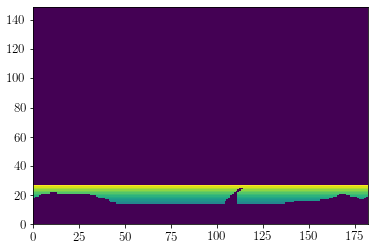

In [31]:
#[0,14,27,36,43,49]

#80-70
#70-60
#60-50
#50-40
#40-30



y1 = 14; y2 = 27
tmeshf = './obs/mmask.nc'
tmesh = xr.open_dataset(tmeshf)
area =  tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]* tmesh.tmask[0,0,:,:]

mask = np.zeros_like(tmesh.e1t[0,:,:].values)
mask[y1:y2,:] = 1

marea = area*mask

plt.pcolormesh(marea)

#tmesh[masknam][:,:]

In [36]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/home/mep22dku/scratch/ModelRuns/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/TOM12_TJ_{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def extract_ts(tdir,y1, y2, masknam, yrst = 1948,yrend = 2019, savenam = True, ):
    
    
    sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
    print(f'qtrB14b_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
    
    ylist = xr.open_mfdataset(make_yearlist(yrst, yrend, 'diad', tdir))
    print('opened')
    
    tmeshf = './obs/mmask.nc'
    tmesh = xr.open_dataset(tmeshf)
    tmeshf = './obs/mmask.nc'
    tmesh = xr.open_dataset(tmeshf)
    area =  tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]* tmesh.tmask[0,0,:,:]
    mask = np.zeros_like(tmesh.e1t[0,:,:].values)
    mask[y1:y2,:] = 1
    marea = area*mask
    
    times = pd.date_range(f'{yrst}/01/01',f'{yrend}/12/31',freq='MS')

    # qtrnewt_B = ylist.qtrB14b * area.values* 3.156e7 *2 *1e-14 *6.023e23*1e-26 #some horrible unit conversion taht corrine understands
    # qtrnewt_C = ylist.qtrC14b * area.values* 3.156e7 *2 *1e-14 *6.023e23*1e-26 
    cflxnewt_D = ylist.Cflx * marea.values* 3.156e7*12e-15  #mol/m2/s > pg/yr

    # qtrnewt_B['time_counter'] = times
    # qtrnewt_C['time_counter'] = times
    cflxnewt_D['time_counter'] = times

    # qtrflx_mn_B = qtrnewt_B.sum(dim = ['x','y'])
    # qtrflx_mn_C = qtrnewt_C.sum(dim = ['x','y'])
    cflxint_mn_D = cflxnewt_D.sum(dim = ['x','y'])

    if savenam:
        # qtrflx_mn_B.to_netcdf(f'{sdir}/qtrB14b_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
        # qtrflx_mn_C.to_netcdf(f'{sdir}/qtrB14b_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
        cflxint_mn_D.to_netcdf(f'{sdir}/cflx_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
        print('saved')
        
        
        

In [50]:

tdir = 'SNCT'

#[0,14,27,36,43,49]

#80-70
#70-60
#60-50
#50-40
#40-30

# plt.figure()

ex = True
if ex:

    tdir = 'SNA0'
    extract_ts(tdir,0,14, '80-70', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,14,27, '70-60', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,27,36, '60-50', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,36,43, '50-40', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,43,49, '40-30', yrst = 1950,yrend = 2022, savenam = True, )


    tdir = 'SEA0'
    extract_ts(tdir,0,14, '80-70', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,14,27, '70-60', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,27,36, '60-50', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,36,43, '50-40', yrst = 1950,yrend = 2022, savenam = True, )
    extract_ts(tdir,43,49, '40-30', yrst = 1950,yrend = 2022, savenam = True, )
    

qtrB14b_SNA0_1950_2022_80-70_ts.nc
opened
saved
qtrB14b_SNA0_1950_2022_70-60_ts.nc
opened
saved
qtrB14b_SNA0_1950_2022_60-50_ts.nc
opened
saved
qtrB14b_SNA0_1950_2022_50-40_ts.nc
opened
saved
qtrB14b_SNA0_1950_2022_40-30_ts.nc
opened
saved
qtrB14b_SEA0_1950_2022_80-70_ts.nc
opened
saved
qtrB14b_SEA0_1950_2022_70-60_ts.nc
opened
saved
qtrB14b_SEA0_1950_2022_60-50_ts.nc
opened
saved
qtrB14b_SEA0_1950_2022_50-40_ts.nc
opened
saved
qtrB14b_SEA0_1950_2022_40-30_ts.nc
opened
saved


80-70
/gpfs/home/mep22dku/scratch/C14/CAL12_series_data//cflx_SECT_1950-2022_80-70_ts.nc
70-60
/gpfs/home/mep22dku/scratch/C14/CAL12_series_data//cflx_SECT_1950-2022_70-60_ts.nc
60-50
/gpfs/home/mep22dku/scratch/C14/CAL12_series_data//cflx_SECT_1950-2022_60-50_ts.nc
50-40
/gpfs/home/mep22dku/scratch/C14/CAL12_series_data//cflx_SECT_1950-2022_50-40_ts.nc
40-30
/gpfs/home/mep22dku/scratch/C14/CAL12_series_data//cflx_SECT_1950-2022_40-30_ts.nc


Text(0.5, 0.98, 'Cflx, effect of climate by latitude band')

<Figure size 432x288 with 0 Axes>

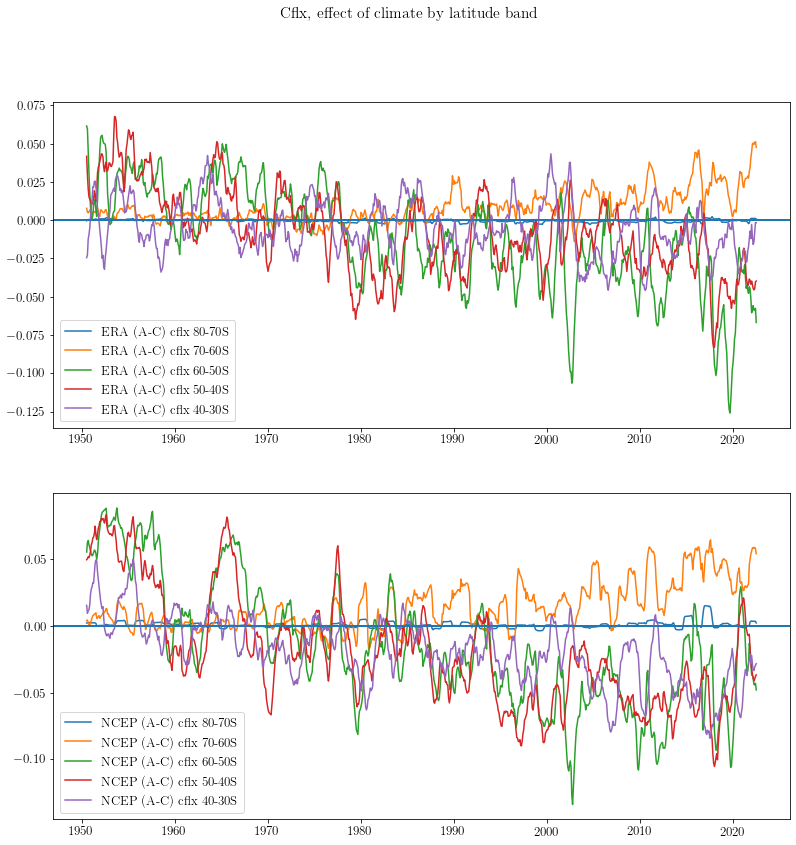

In [57]:


plt.figure()

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


for i in range(0,5):
    
    st = 80-(i*10)
    en = st-10
    masknam = f'{st}-{en}'
    sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
    print(masknam)
    
    #cflx_SNCT_1950_2022_80-70_ts.nc
    print((f'{sdir}/cflx_SECT_1950-2022_{masknam}_ts.nc'))
    efil = xr.open_dataset(f'{sdir}/cflx_SECT_1950_2022_{masknam}_ts.nc')
    efil2 = xr.open_dataset(f'{sdir}/cflx_SEA0_1950_2022_{masknam}_ts.nc')
    nfil = xr.open_dataset(f'{sdir}/cflx_SNCT_1950_2022_{masknam}_ts.nc')
    nfil2 = xr.open_dataset(f'{sdir}/cflx_SNA0_1950_2022_{masknam}_ts.nc')
    
    
    
# cflx_r = cflxf.rolling(time_counter=12, center=True).mean()
# axs[2].plot(cflx_r.time_counter, cflx_r.Cflx, \
#             color = prod[p]['col'], linestyle = prod[p]['linestyle'],
#            label = prod[p]['fnam'])

    cflx_r = efil2.rolling(time_counter=12, center=True).mean() - efil.rolling(time_counter=12, center=True).mean()
    axs[0].plot(cflx_r.time_counter, cflx_r.Cflx, linestyle = '-', label = f'ERA (A-C) cflx {masknam}S')
    
    cflx_r = nfil2.rolling(time_counter=12, center=True).mean() - nfil.rolling(time_counter=12, center=True).mean()
    axs[1].plot(cflx_r.time_counter, cflx_r.Cflx, linestyle = '-', label = f'NCEP (A-C) cflx {masknam}S')
    
    axs[0].legend()
    axs[1].legend()
    
    axs[0].axhline(y=0)
    axs[1].axhline(y=0)
    
    
plt.suptitle('Cflx, effect of climate by latitude band')

In [63]:

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] #size in m3

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values #broadcast area 
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:] # multiply by e3t and size, volume in m3

cvol = cvol.rename({'z': 'deptht'})

In [64]:
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SNA0/ORCA2_1m_20200101_20201231_ptrc_T.nc')

In [71]:
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])

Text(0.5, 0.98, 'depth gradient of C14 and B14 (note that only NEW has nomenclature right)')

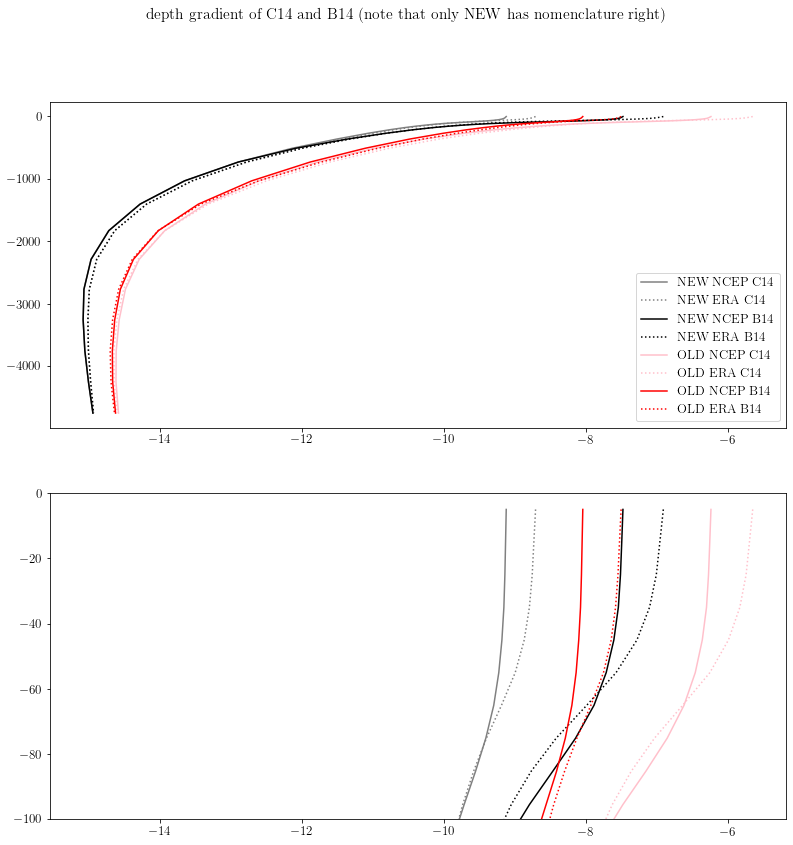

In [89]:

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SNCT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'grey', linestyle = '-', label = 'NEW NCEP C14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SECT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'grey', linestyle = ':', label = 'NEW ERA C14')

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SNCT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'k', linestyle = '-', label = 'NEW NCEP B14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SECT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'k', linestyle = ':', label = 'NEW ERA B14')

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CNC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'pink', linestyle = '-', label = 'OLD NCEP C14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CEC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'pink', linestyle = ':', label = 'OLD ERA C14')

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CNC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'r', linestyle = '-', label = 'OLD NCEP B14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CEC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[0].plot(v,-v.deptht, color = 'r', linestyle = ':', label = 'OLD ERA B14')

axs[0].legend(loc = 'best')


w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SNCT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'grey', linestyle = '-', label = 'NEW NCEP C14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SECT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'grey', linestyle = ':', label = 'NEW ERA C14')

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SNCT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'k', linestyle = '-', label = 'NEW NCEP B14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_SECT/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'k', linestyle = ':', label = 'NEW ERA B14')

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CNC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'pink', linestyle = '-', label = 'OLD NCEP C14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CEC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['C14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'pink', linestyle = ':', label = 'OLD ERA C14')

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CNC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'r', linestyle = '-', label = 'OLD NCEP B14')
w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CEC4/ORCA2_1m_19600101_19601231_ptrc_T.nc')
v = w['B14B'].isel(y = slice(0,37)).weighted(cvol.isel(y = slice(0,37))).mean(dim = ['x','y','time_counter'])
axs[1].plot(v,-v.deptht, color = 'r', linestyle = ':', label = 'OLD ERA B14')

axs[1].set_ylim([-100,0])

plt.suptitle('depth gradient of C14 and B14 (note that only NEW has nomenclature right)')